In [2]:
import pandas as pd
#loading Dataset
dataset = pd.read_csv('framingham.csv')

In [3]:
print("Sample data:")
print(dataset.head())

Sample data:
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   target  
0       0  
1       0  
2

# Exploratory Data Analysis

0 - absence of HD
1 - presence of HD
0    3596
1     644
Name: target, dtype: int64


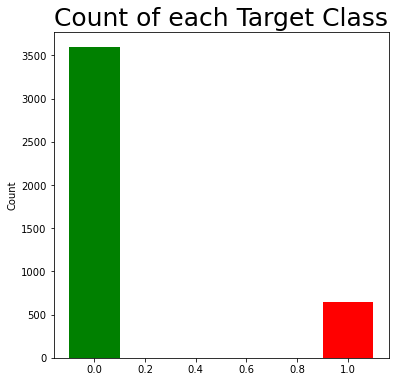

In [4]:
import matplotlib.pyplot as plt
print("0 - absence of HD")
print("1 - presence of HD")
print(dataset.target.value_counts())
# 0 - absence of HD
# 1 - presence of HD
plt.figure(figsize=(6, 6))
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['green', 'red'],width=0.2)
plt.ylabel('Count')
plt.title('Count of each Target Class', size = 25)
plt.show()

array([[<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>],
       [<AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>],
       [<AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'target'}>]], dtype=object)

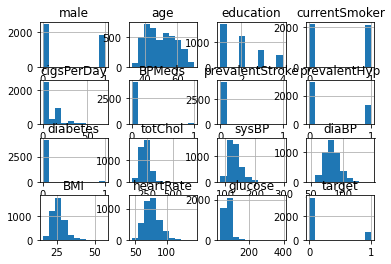

In [5]:
dataset.hist()

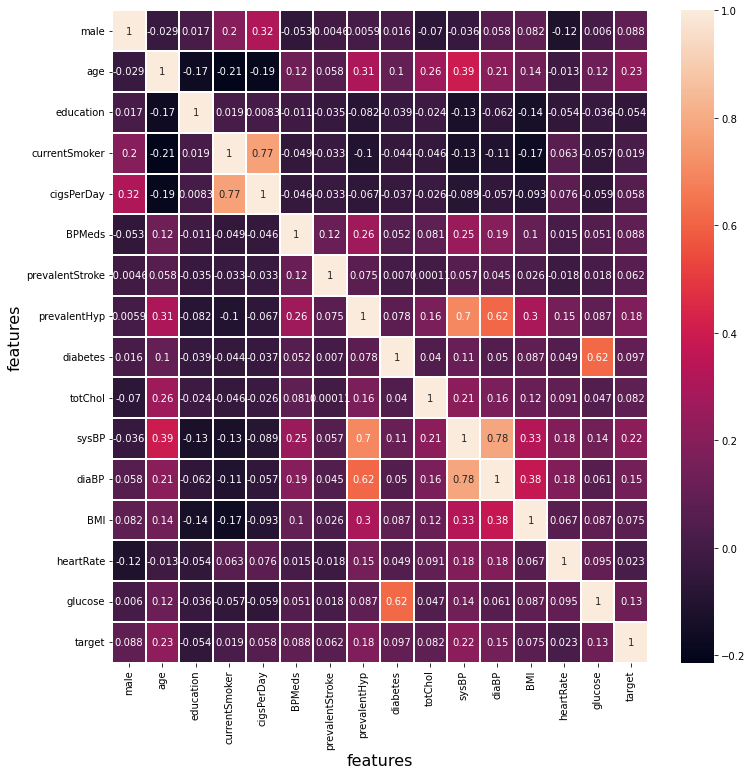

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(dataset.corr(),linewidth=.02,annot=True)
plt.xlabel('features', fontsize=16)
plt.ylabel('features', fontsize=16)
plt.show()

# preprocessing

In [7]:
print("\nMissing values:")
print(dataset.isnull().sum())


Missing values:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
target               0
dtype: int64


In [8]:
dataset = dataset.apply(pd.to_numeric, errors='coerce')
# Fill NaN values with 0
dataset.fillna(0, inplace=True)

In [9]:
if 'Unnamed: 0' in dataset.columns:
    dataset = dataset.drop('Unnamed: 0', axis=1)

# splitting dataset

In [10]:
predictors = dataset.drop("target",axis=1)
target = dataset["target"]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.2,random_state=0)

In [12]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=3):
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)

      return {"Training Accuracy scores": results['train_accuracy'],
              "Training Precision scores": results['train_precision'],
              "Training Recall scores": results['train_recall'],
              "Training F1 scores": results['train_f1'],
              "Validation Accuracy scores": results['test_accuracy'],
              "Validation Precision scores": results['test_precision'],
              "Validation Recall scores": results['test_recall'],
              "Validation F1 scores": results['test_f1']
              }

# naive bayes

In [13]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import numpy as np
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=10)
}
nb = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb,  cv=3, n_jobs=-1)
nb.fit(X_train, Y_train)
nb_result = cross_validation(nb, X_train, Y_train, 3)
print(nb_result)
Y_pred_nb = nb.predict(X_test)
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
precision_nb = round(precision_score(Y_test,Y_pred_nb)*100,2)
recall_nb = round(recall_score(Y_test,Y_pred_nb)*100,2)
f1_nb = round(f1_score(Y_test,Y_pred_nb)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")
print("The precision score achieved using Naive Bayes is: "+str(precision_nb)+" %")
print("The recall score achieved using Naive Bayes is: "+str(recall_nb)+" %")
print("The f1 score achieved using Naive Bayes is: "+str(f1_nb)+" %")
print()

{'Training Accuracy scores': array([0.8487395 , 0.84962406, 0.85057471]), 'Training Precision scores': array([0.66666667, 0.72727273, 0.78571429]), 'Training Recall scores': array([0.0173913 , 0.02318841, 0.03179191]), 'Training F1 scores': array([0.03389831, 0.04494382, 0.06111111]), 'Validation Accuracy scores': array([0.84969054, 0.84880637, 0.84867257]), 'Validation Precision scores': array([0.8 , 0.75, 0.6 ]), 'Validation Recall scores': array([0.02312139, 0.01734104, 0.01744186]), 'Validation F1 scores': array([0.04494382, 0.03389831, 0.03389831])}
The accuracy score achieved using Naive Bayes is: 85.02 %
The precision score achieved using Naive Bayes is: 33.33 %
The recall score achieved using Naive Bayes is: 0.79 %
The f1 score achieved using Naive Bayes is: 1.55 %



# support vector machine

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf',random_state=42,probability=True)
# Train the SVM model on the training data
svm_classifier.fit(X_train_scaled, Y_train)
svm_result = cross_validation(svm_classifier, X_train, Y_train, 3)
print(svm_result)
# Make predictions on the test data
Y_pred_svm = svm_classifier.predict(X_test_scaled)
# Evaluate the performance of the SVM model
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
precision_svm = round(precision_score(Y_test,Y_pred_svm)*100,2)
recall_svm = round(recall_score(Y_test,Y_pred_svm)*100,2)
f1_svm = round(f1_score(Y_test,Y_pred_svm)*100,2)

print("The accuracy score achieved using Support Vector Machine is: "+str(score_svm)+" %")
print("The precision score achieved using Support Vector Machine is: "+str(precision_svm)+" %")
print("The recall score achieved using Support Vector Machine is: "+str(recall_svm)+" %")
print("The f1 score achieved using Support Vector Machine is: "+str(f1_svm)+" %")
print()


{'Training Accuracy scores': array([0.84829721, 0.84918178, 0.85057471]), 'Training Precision scores': array([1.        , 0.83333333, 0.9       ]), 'Training Recall scores': array([0.0057971 , 0.01449275, 0.02601156]), 'Training F1 scores': array([0.01152738, 0.02849003, 0.0505618 ]), 'Validation Accuracy scores': array([0.84792219, 0.84792219, 0.84867257]), 'Validation Precision scores': array([1.        , 1.        , 0.66666667]), 'Validation Recall scores': array([0.00578035, 0.00578035, 0.01162791]), 'Validation F1 scores': array([0.01149425, 0.01149425, 0.02285714])}
The accuracy score achieved using Support Vector Machine is: 84.79 %
The precision score achieved using Support Vector Machine is: 28.57 %
The recall score achieved using Support Vector Machine is: 1.59 %
The f1 score achieved using Support Vector Machine is: 3.01 %



# K nearest neighbour

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on the training data
knn_classifier.fit(X_train_scaled, Y_train)
knn_result = cross_validation(knn_classifier, X_train, Y_train, 3)
print("Cross-Validation Results:")
print(knn_result)
# Make predictions on the test data
Y_pred_knn = knn_classifier.predict(X_test_scaled)

# Evaluate the performance of the KNN model
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
precision_knn = round(precision_score(Y_test,Y_pred_knn)*100,2)
recall_knn = round(recall_score(Y_test,Y_pred_knn)*100,2)
f1_knn= round(f1_score(Y_test,Y_pred_knn)*100,2)

print("The accuracy score achieved using Support Vector Machine is: "+str(score_knn)+" %")
print("The precision score achieved using Support Vector Machine is: "+str(precision_knn)+" %")
print("The recall score achieved using Support Vector Machine is: "+str(recall_knn)+" %")
print("The f1 score achieved using Support Vector Machine is: "+str(f1_knn)+" %")
print()

Cross-Validation Results:
{'Training Accuracy scores': array([0.87041132, 0.86510394, 0.86604775]), 'Training Precision scores': array([0.79545455, 0.67857143, 0.67479675]), 'Training Recall scores': array([0.20289855, 0.22028986, 0.23988439]), 'Training F1 scores': array([0.32332564, 0.33260394, 0.35394456]), 'Validation Accuracy scores': array([0.83554377, 0.83023873, 0.83539823]), 'Validation Precision scores': array([0.38181818, 0.3442623 , 0.33333333]), 'Validation Recall scores': array([0.12138728, 0.12138728, 0.08139535]), 'Validation F1 scores': array([0.18421053, 0.17948718, 0.13084112])}
The accuracy score achieved using Support Vector Machine is: 84.32 %
The precision score achieved using Support Vector Machine is: 40.0 %
The recall score achieved using Support Vector Machine is: 11.11 %
The f1 score achieved using Support Vector Machine is: 17.39 %



# Decision Tree

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# Initialize the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
# Train the Decision Tree model on the training data
decision_tree_classifier.fit(X_train, Y_train)
dt_result = cross_validation(decision_tree_classifier, X_train, Y_train, 3)
print(dt_result)
# Make predictions on the test data
Y_pred_dt = decision_tree_classifier.predict(X_test)
# Evaluate the performance of the Decision Tree model
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
precision_dt = round(precision_score(Y_test,Y_pred_dt)*100,2)
recall_dt = round(recall_score(Y_test,Y_pred_dt)*100,2)
f1_dt= round(f1_score(Y_test,Y_pred_dt)*100,2)
print("The accuracy score achieved using Support Vector Machine is: "+str(score_dt)+" %")
print("The precision score achieved using Support Vector Machine is: "+str(precision_dt)+" %")
print("The recall score achieved using Support Vector Machine is: "+str(recall_dt)+" %")
print("The f1 score achieved using Support Vector Machine is: "+str(f1_dt)+" %")
print()

{'Training Accuracy scores': array([1., 1., 1.]), 'Training Precision scores': array([1., 1., 1.]), 'Training Recall scores': array([1., 1., 1.]), 'Training F1 scores': array([1., 1., 1.]), 'Validation Accuracy scores': array([0.75862069, 0.74977896, 0.74867257]), 'Validation Precision scores': array([0.23404255, 0.20108696, 0.24774775]), 'Validation Recall scores': array([0.25433526, 0.21387283, 0.31976744]), 'Validation F1 scores': array([0.24376731, 0.20728291, 0.27918782])}
The accuracy score achieved using Support Vector Machine is: 73.58 %
The precision score achieved using Support Vector Machine is: 19.75 %
The recall score achieved using Support Vector Machine is: 25.4 %
The f1 score achieved using Support Vector Machine is: 22.22 %



# XG boost

In [21]:
import xgboost as xgb
import numpy as np
# Set XGBoost parameters 
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, max_depth=1)
# Train the model
xgb_model.fit(X_train, Y_train)
# Perform cross-validation
xgb_result = cross_validation(xgb_model, X_train, Y_train)
print(xgb_result)
# Evaluate on test set
Y_pred_xgb = xgb_model.predict(X_test)
# Evaluate the performance of the XG Boost
score_xgb = round(accuracy_score(Y_pred_xgb, Y_test) * 100, 2)
precision_xgb = round(precision_score(Y_test, Y_pred_xgb) * 100, 2)
recall_xgb = round(recall_score(Y_test, Y_pred_xgb) * 100, 2)
f1_xgb = round(f1_score(Y_test, Y_pred_xgb) * 100, 2)
print("The accuracy score achieved using XGBoost is:", score_xgb, "%")
print("The precision score achieved using XGBoost is:", precision_xgb, "%")
print("The recall score achieved using XGBoost is:", recall_xgb, "%")
print("The f1 score achieved using XGBoost is:", f1_xgb, "%")

{'Training Accuracy scores': array([0.85802742, 0.8611234 , 0.85587975]), 'Training Precision scores': array([0.85294118, 0.80392157, 0.77777778]), 'Training Recall scores': array([0.08405797, 0.11884058, 0.08092486]), 'Training F1 scores': array([0.1530343 , 0.20707071, 0.14659686]), 'Validation Accuracy scores': array([0.85322723, 0.84969054, 0.84867257]), 'Validation Precision scores': array([0.66666667, 0.6       , 0.52631579]), 'Validation Recall scores': array([0.08092486, 0.05202312, 0.05813953]), 'Validation F1 scores': array([0.1443299 , 0.09574468, 0.10471204])}
The accuracy score achieved using XGBoost is: 85.5 %
The precision score achieved using XGBoost is: 63.64 %
The recall score achieved using XGBoost is: 5.56 %
The f1 score achieved using XGBoost is: 10.22 %


# visualization

The accuracy score achieved using Naive Bayes is: 85.02 %
The accuracy score achieved using Support Vector Machine is: 84.79 %
The accuracy score achieved using K-Nearest Neighbors is: 84.32 %
The accuracy score achieved using Decision Tree is: 73.58 %
The accuracy score achieved using XGBoost is: 85.5 %


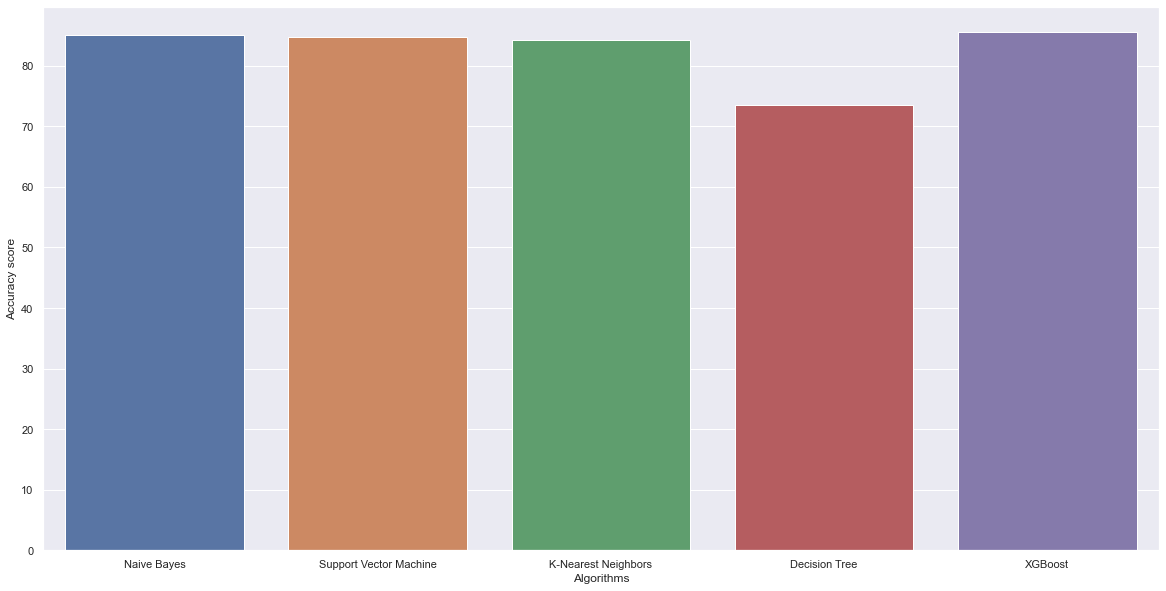

In [22]:
acc_scores = [score_nb,score_svm,score_knn,score_dt,score_xgb]
algorithms = ["Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","XGBoost"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(acc_scores[i])+" %")

sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(x=algorithms,y=acc_scores)
plt.show()

print()

# Ensembling

[[717   5]
 [123   3]]


,Model,Accuracy,Precision,Recall,F1 Score,Specificity
0,Hard Voting,0.849057,0.375,0.02381,0.044776,0.993075


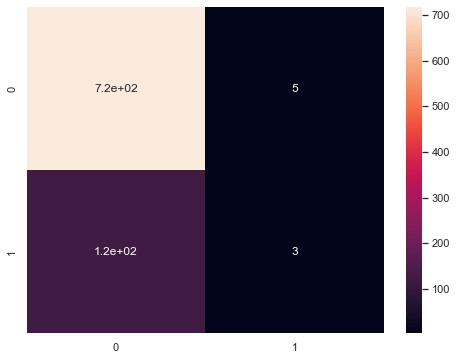

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.ensemble import VotingClassifier
estimators=[('nb', nb),('dt',decision_tree_classifier),('knn',knn_classifier),('svm',svm_classifier),('xgb', xgb_model)]
#create our voting classifier, inputing our models
ensemble = VotingClassifier(estimators, voting='hard')
# Train the model
ensemble.fit(X_train, Y_train)
ensemble.score(X_test, Y_test)
# Make predictions on the test data
y_pred_hv = ensemble.predict(X_test)

CM_hv=confusion_matrix(Y_test,y_pred_hv)
print(CM_hv)
plt.figure(figsize=(8, 6)) 
sns.heatmap(CM_hv, annot=True)

TN = CM_hv[0][0]
FN = CM_hv[1][0]
TP = CM_hv[1][1]
FP = CM_hv[0][1]
specificity = TN/(TN+FP)
acc_hv= accuracy_score(Y_test, y_pred_hv)
prec_hv = precision_score(Y_test, y_pred_hv)
rec_hv = recall_score(Y_test, y_pred_hv)
f1s_hv = f1_score(Y_test, y_pred_hv)

score_hv= round(acc_hv*100,2)
precision_hv= round(prec_hv*100,2)
recall_hv = round(rec_hv*100,2)
f1_hv = round(f1s_hv*100,2)

model_results =pd.DataFrame([['Hard Voting',acc_hv, prec_hv,rec_hv,f1s_hv,specificity]],
               columns = ['Model', 'Accuracy','Precision', 'Recall', 'F1 Score','Specificity'])

model_results

In [24]:
hv_result = cross_validation(ensemble, X_train, Y_train, 3)
print(hv_result)

{'Training Accuracy scores': array([0.85714286, 0.85758514, 0.85499558]), 'Training Precision scores': array([0.92307692, 0.92592593, 0.95      ]), 'Training Recall scores': array([0.06956522, 0.07246377, 0.05491329]), 'Training F1 scores': array([0.12938005, 0.1344086 , 0.10382514]), 'Validation Accuracy scores': array([0.85057471, 0.85145889, 0.84867257]), 'Validation Precision scores': array([0.83333333, 0.85714286, 0.57142857]), 'Validation Recall scores': array([0.02890173, 0.03468208, 0.02325581]), 'Validation F1 scores': array([0.05586592, 0.06666667, 0.04469274])}


In [26]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        # Set size of plot
        plt.figure(figsize=(12,3))
        labels = ["1st Fold", "2nd Fold", "3rd Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.show()
plot_result

<function __main__.plot_result(x_label, y_label, plot_title, train_data, val_data)>

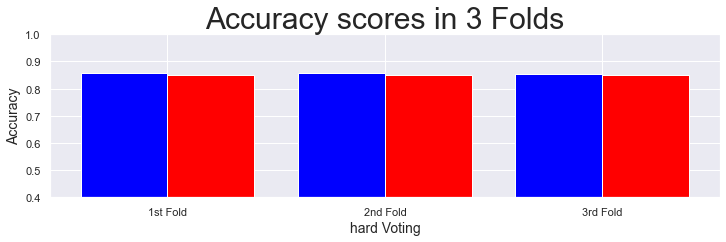

The accuracy score achieved using  is: 84.91 %


In [27]:
model_name = "hard Voting"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 3 Folds",
            hv_result["Training Accuracy scores"],
            hv_result["Validation Accuracy scores"])
print("The accuracy score achieved using  is: "+str(score_hv)+" %")


# final prediction

In [30]:
import numpy as np
def check(value):
    #Defining conditions for each value of the dataset
    values=np.asarray(value)
    if values[0] < 0 or values[0] > 1:
        msg = "Invalid Value 1. Refer USER HELP for guidance"
        print(msg)
    elif values[1] > 100 or values[1] < 10:
        msg = "Invalid Value 2. Refer USER HELP for guidance"
        print(msg)
    elif values[2] < 1 or values[2] > 4:
        msg = "Invalid Value 3. Refer USER HELP for guidance"
        print(msg)
    elif values[3] < 0 or values[3] > 1:
        msg = "Invalid Value 4. Refer USER HELP for guidance"
        print(msg)
    elif (values[3] == 1 and values[4] == 0) or (values[3] == 0 and values[4] != 0):
        msg = "Invalid Value 5. If you are a current smoker,then give valid count of cigarettes you smoke per day"
        print(msg)
    elif values[4] < 0:
        msg = "Invalid Value 5. Refer USER HELP for guidance"
        print(msg)
    elif values[5] < 0 or values[5] > 1:
        msg = "Invalid Value 6. Refer USER HELP for guidance"
        print(msg)
    elif values[6] < 0 or values[6] > 1:
        msg = "Invalid Value 7. Refer USER HELP for guidance"
        print(msg)
    elif values[7] < 0 or values[7] > 1:
        msg = "Invalid Value 8. Refer USER HELP for guidance"
        print(msg)
    elif values[8] < 0 or values[8] > 1:
        msg = "Invalid Value 9. Refer USER HELP for guidance"
        print(msg)
    elif values[9] < 80 or values[9] > 450:
        msg = "Invalid Value 10. Refer USER HELP for guidance"
        print(msg)
    elif values[10] < 90 or values[10] > 250:
        msg = "Invalid Value 11. Refer USER HELP for guidance"
        print(msg)
    elif values[11] < 60 or values[11] > 140:
        msg = "Invalid Value 12. Refer USER HELP for guidance"
        print(msg)
    elif values[12] < 18.5 or values[12] > 30:
        msg = "Invalid Value 12. Refer USER HELP for guidance"
        print(msg)
    elif values[13] < 50 or values[13] > 160:
        msg = "Invalid Value 13. Refer USER HELP for guidance"
        print(msg)
    elif values[14] < 50 or values[14] > 130:
        msg = "Invalid Value 15. Refer USER HELP for guidance"
        print(msg)
    else:
        def checkRecord(value):
            input_as_numpy=np.asarray(value)
            input_reshaped=input_as_numpy.reshape(1,-1)
            pre1=ensemble.predict(input_reshaped)
            if(pre1==1):
                print("The patient seems to be have heart disease")
            else:
                print("The patient seems to be Normal")
        checkRecord(value)    

In [31]:
check( [1, 11, 1, 0, 0, 0, 0, 0, 0, 120, 99, 70, 25,55,55])

The patient seems to be Normal
